**Assignment** **1-Neural Networks**

*Classification of Movie Reviews: A binary Classification Problem*

**Problem Statement:**
Classify a movie review as either positive or negative using Neural Networks.

In [ ]:
#Loading the IMDB Dataset

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])


9999

In [ ]:
# Decoding reviews back to text

# step 1: Load the dictionary mappings from the word to the integer index.
word_index = imdb.get_word_index()

# step 2: Word index to integer mapping in reverse.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# step 3: Decode the review, mapping integer to words.
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data:**

The lists are converted into vectors of 0s and 1s using multi-hot encoding. Dimension is set to 10000, and each review is represented by a 10000-dimensional vector.




In [ ]:
# The integer sequences are encoded using multi-hot encoding.

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building the Model:**

*Architecture of the Model:* 

1. For this categorization task, we are utilizing the Keras library.
2. The first two hidden layers each include 16 nodes with an activation function of **ReLU** (the activation function is modified to **tanh** to see how various activation functions affect the accuracy of the Validation and test set).
3. The output layer, which employs a sigmoid function, is the third layer.














In [ ]:
from tensorflow import keras
from tensorflow.keras.layers  import Dropout
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
Dropout(0.5),
    layers.Dense(32, activation="tanh"),
  Dropout(0.5),
     layers.Dense(32, activation="tanh"),
     layers.Dense(1, activation="sigmoid")
])

**Compiling the model:**

The following functions are used to compile the model:


* rmsprop optimizer is used.
* Loss function is binary_crossentropy as it is a binary classification problem.
* The measure of performance is Accuracy.






In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


**Partitioning the data into Training and Validation set:**

A portion of the data is being kept aside to validate the model's performance. Validation is performed to tune the hyperparameters while determining the best value. We normally change the hyperparameter value in the training set and then test the model on the validation set. This hyperparameter adjustment is repeated until the maximum accuracy is achieved. (In our situation, we are assessing the model's performance by Accuracy).

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the Model:**

We are first training the model in batches of 20 (epochs) using 512 samples. Subsequently, the number of epochs is modified dependent on the loss function and accuracy.

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 94ms/step - loss: 0.1755 - accuracy: 0.7411 - val_loss: 0.1061 - val_accuracy: 0.8552
Epoch 2/20
30/30 [==============================] - 3s 103ms/step - loss: 0.0979 - accuracy: 0.8710 - val_loss: 0.0855 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 2s 76ms/step - loss: 0.0773 - accuracy: 0.8987 - val_loss: 0.0913 - val_accuracy: 0.8769
Epoch 4/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0664 - accuracy: 0.9127 - val_loss: 0.0957 - val_accuracy: 0.8721
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 0.0550 - accuracy: 0.9311 - val_loss: 0.0896 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0529 - accuracy: 0.9321 - val_loss: 0.0898 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 2s 68ms/step - loss: 0.0454 - accuracy: 0.9421 - val_loss: 0.0974 - val_accuracy: 0.8773
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

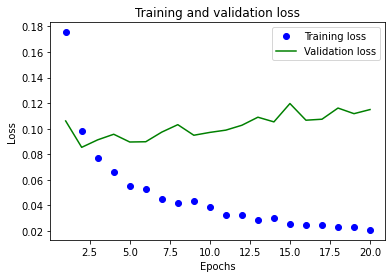

In [ ]:
#Plotting the Validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

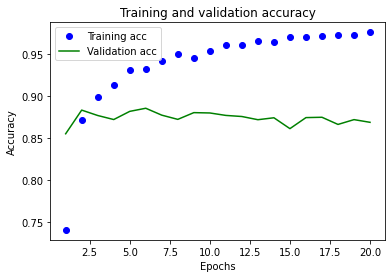

In [ ]:
#Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plots,

We can observe that the minimum validation loss and maximum accuracy is obtained nearly at 2 epochs(less than 2.5 according to the plots.)
After 2.5 epochs, the accuracy on the training data is improving whereas the accuracy on the Validation data is decreasing. This means that after 2.5 epochs, model is overfitted.


To decrease model's overfitting, 2 epochs is chosen as optimal number of epochs.

In [ ]:
#Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/2
30/30 [==============================] - 2s 83ms/step - loss: 0.0188 - accuracy: 0.9785 - val_loss: 0.1114 - val_accuracy: 0.8730
Epoch 2/2
30/30 [==============================] - 2s 72ms/step - loss: 0.0202 - accuracy: 0.9768 - val_loss: 0.1117 - val_accuracy: 0.8726


The accuracy of the model on Validation set is 87.40 and 87.39 on each epoch respectively.

In [ ]:
#Testing on test data

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
        layers.Dense(16, activation="tanh"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/2
49/49 [==============================] - 4s 36ms/step - loss: 0.1430 - accuracy: 0.8196
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0851 - accuracy: 0.8847


[0.08512948453426361, 0.8847200274467468]

After deploying the model on the Test data(unseen data), accuracy is recorded to be 88.49

**Dropout technique:**

The Dropout approach is being used to increase the model's accuracy on Validation and Test data.

With this approach, one dropout layer with a dropout value of 10% is applied. This dropout percentage number will randomly drop out 10% of the nodes in between the layers, ensuring that the model only captures the important characteristics and ignores noise (if any).

After experimenting with different numbers of nodes (16,32,64,128 etc), the number of nodes in each layer is set at 20 since the accuracy is higher at 20 nodes. Similarly, I investigated the model's performance with fewer and more nodes (the findings are included in the summary sheet/reports).

I used both ReLU and tanh activation functions for better performance of the model.

In [ ]:
#Dropouts

from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import models

dpt_model = models.Sequential()

dpt_model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.1))
dpt_model.add(layers.Dense(20, activation='tanh', input_shape=(10000,)))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Re-training the model on 2 epochs after implementing Dropout technique:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/2
30/30 [==============================] - 2s 60ms/step - loss: 0.0405 - accuracy: 0.9531 - val_loss: 0.0431 - val_accuracy: 0.9486
Epoch 2/2
30/30 [==============================] - 2s 51ms/step - loss: 0.0279 - accuracy: 0.9723 - val_loss: 0.0472 - val_accuracy: 0.9399


After using the Dropout technique, there is a significant improvement in the validation accuracy which is 94.73 and 93.79 on each of the epoch. This shows an approximate improvement of 6% after using Dropout technique.

In [ ]:
# Retesting the model:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
        layers.Dense(16, activation="tanh"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results


Epoch 1/2
49/49 [==============================] - 3s 27ms/step - loss: 0.4691 - accuracy: 0.8154
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.2844 - accuracy: 0.8856


[0.2843990623950958, 0.8855999708175659]

After using Dropout technique, we can see that the accuracy is droped to 88.38 from 88.49.

**Input units directly proportional to accuracy**
Based on current model performance, it appears that validation accuracy has reached a plateau after a few epochs. In addition to regularization strategies, we may experiment with adjusting the amount of input units, which may affect the model's learning ability.

With the present model, the first hidden layer contains 16 units. We raised the units in the hidden layers to 32 and 64 to see how it affected the validation accuracy.

In the given case, increasing the number of input units from 16 to 32 improved the validation accuracy of the model by 0.01. This improvement, however, was minor in comparison to the rise in the number of model parameters, which also raised the risk of overfitting.

1. To begin, we employed a network model with two hidden layers rather than simply one. At each epoch, the model's performance measures (loss and accuracy) change.

 In comparison to the model with only one hidden layer, adding additional hidden layer helps the model to learn more complicated data representations. This may result in improved performance on the validation set. Having too many hidden layers, on the other hand, might lead to overfitting, in which the model memorizes the training data too well and performs badly on new data. A compromise must be struck between model complexity and performance.

 With a final validation accuracy of 0.9379, the model appears to be doing well on both the training and validation sets, according to the performance metrics. Nevertheless, towards the conclusion of training, there is a minor rise in validation loss, which may imply overfitting. To avoid overfitting, it may be worthwhile to investigate approaches such as dropout or regularization.

2. The accuracy has dropped by changing the loss function to mse, however this is to be anticipated because the loss function and the accuracy metric are not directly connected. The model is optimizing for the mean squared error, as opposed to the binary cross-entropy loss. Yet, it is still a legitimate strategy that, depending on the issue and data, may outperform binary cross-entropy.

 While using the mean squared error (MSE) loss function may be more appropriate for regression issues, it does not always increase model performance. In this example, it appears to have reduced the model's accuracy.

 As a result, I would recommend staying with the binary crossentropy loss function for this situation.

 The tanh activation function was used to train a neural network model for a binary classification problem in the supplied code. The validation accuracy and loss were tracked for each epoch during the training period of 20 epochs.

 The tanh (hyperbolic tangent) function is a symmetric activation function that transfers input values from -1 to 1. The tanh function returns 0 at its mean, making it handy for standardizing input numbers.

 Overall, the tanh activation function appears to perform quite well for the current binary classification problem, although more testing with alternative activation functions and hyperparameters may aid in improving performance.

 This appears to be the result of a neural network model trained using the dropout approach.

 Dropout is a strategy used in neural networks to minimize overfitting. Dropout randomly drops out (i.e., sets to zero) part of the neurons in the network during training. This keeps any one neuron from being very significant in the model and drives the network to acquire more robust properties.

 Looking at the training output, we can see that the model was trained for 20 epochs, and that the accuracy on the training set grew in succeeding epochs, showing that the model was improving its fit to the training data. The accuracy on the validation set, on the other hand, remained reasonably consistent, indicating that the model was not overfitting.

 This is most likely owing to the model's usage of dropout. Dropout prevents any one neuron from becoming very significant in the model, hence preventing overfitting.

 To summarize, the above output is most likely the result of a neural network model that was trained using the dropout strategy to avoid overfitting. The use of dropout enabled the model to perform well on the validation set while not overfitting to the training data.